In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
dt = pd.read_csv('../data.csv', index_col=0)
dt = dt.sort_index()

In [57]:
dt

,revenue,cost_price,assets,capital,net_profit,dividend,n_shares,share_price
2015,1.897000e+11,8.310000e+10,2.165000e+11,6.000000e+10,3.640000e+10,1.810000e+10,129500000.0,2821.0
2016,1.877000e+11,8.800000e+10,2.292000e+11,8.830000e+10,4.290000e+10,2.800000e+10,129500000.0,2599.0
2017,1.814000e+11,1.014000e+11,2.516000e+11,9.810000e+10,2.120000e+10,1.050000e+10,129500000.0,2499.0
2018,2.333120e+11,1.240080e+11,2.862230e+11,1.098210e+11,4.170000e+10,2.490000e+10,129500000.0,2546.0
2019,2.481250e+11,1.362240e+11,3.026210e+11,1.256370e+11,3.710000e+10,2.490000e+10,129500000.0,2652.0


In [80]:
dt['obligations'] = dt['assets'] - dt['capital']
dt['capitalization'] = dt['n_shares']*dt['share_price']

## Динамика выручки, капитала, обязательств, активов

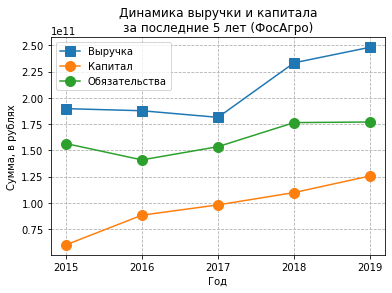

In [46]:
plt.plot(dt.index, dt['revenue'], marker='s', ms=10, label='Выручка')
plt.plot(dt.index, dt['capital'], marker='o', ms=10, label='Капитал')
plt.plot(dt.index, dt['obligations'], marker='o', ms=10, label='Обязательства')
plt.xticks([2015, 2016, 2017, 2018, 2019], [2015, 2016, 2017, 2018, 2019])
plt.legend()
plt.title('Динамика выручки и капитала\nза последние 5 лет (ФосАгро)')
plt.xlabel('Год')
plt.ylabel('Сумма, в рублях')
plt.grid(ls='--')

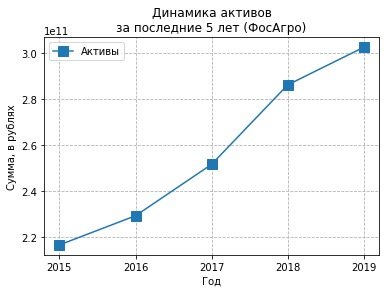

In [47]:
plt.plot(dt.index, dt['assets'], marker='s', ms=10, label='Активы')
plt.xticks([2015, 2016, 2017, 2018, 2019], [2015, 2016, 2017, 2018, 2019])
plt.legend()
plt.title('Динамика активов\nза последние 5 лет (ФосАгро)')
plt.xlabel('Год')
plt.ylabel('Сумма, в рублях')
plt.grid(ls='--')

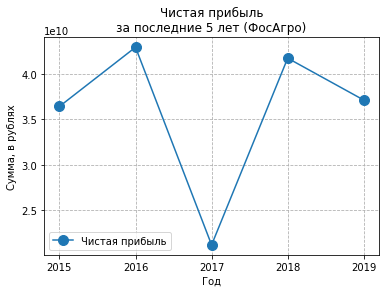

In [65]:
name = "Чистая прибыль"
plt.plot(dt.index, dt['net_profit'], marker='o', ms=10, label='Чистая прибыль')
plt.xticks(dt.index, dt.index.astype('str'))
plt.legend()
plt.title(f'{name}\nза последние 5 лет (ФосАгро)')
plt.xlabel('Год')
plt.ylabel('Сумма, в рублях')
plt.grid(ls='--')

## ROA

In [59]:
assets = dt['assets'].values
mean_assets = (assets[:-1] + assets[1:])/2

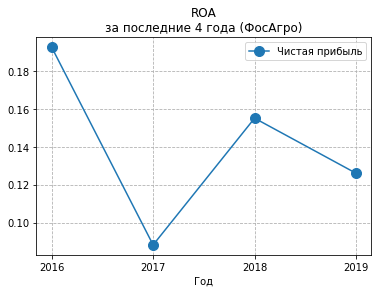

In [68]:
name = "ROA"
plt.plot( dt.index[1:], dt['net_profit'][1:]/mean_assets, marker='o', ms=10, label='Чистая прибыль' )
plt.xticks(dt.index[1:], dt.index[1:].astype('str'))
plt.legend()
plt.title(f'{name}\nза последние 4 года (ФосАгро)')
plt.xlabel('Год')
plt.grid(ls='--')

## Дивиденды

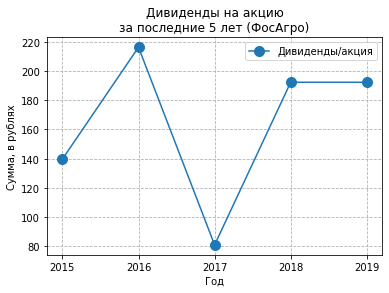

In [71]:
name = "Дивиденды на акцию"
plt.plot( dt.index, dt['dividend']/dt['n_shares'], marker='o', ms=10, label='Дивиденды/акция' )
plt.xticks(dt.index, dt.index.astype('str'))
plt.legend()
plt.title(f'{name}\nза последние 5 лет (ФосАгро)')
plt.xlabel('Год')
plt.ylabel('Сумма, в рублях')
plt.grid(ls='--')

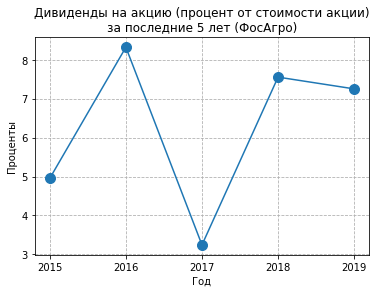

In [74]:
name = "Дивиденды на акцию (процент от стоимости акции)"
plt.plot( dt.index, 100*dt['dividend']/dt['n_shares']/dt['share_price'], marker='o', ms=10, label='' )
plt.xticks(dt.index, dt.index.astype('str'))
# plt.legend()
plt.title(f'{name}\nза последние 5 лет (ФосАгро)')
plt.xlabel('Год')
plt.ylabel('Проценты')
plt.grid(ls='--')

## Капитализация

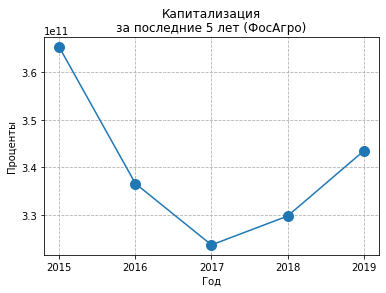

In [75]:
name = "Капитализация"
plt.plot( dt.index, dt['capitalization'], marker='o', ms=10, label='Капитализация' )
plt.xticks(dt.index, dt.index.astype('str'))
# plt.legend()
plt.title(f'{name}\nза последние 5 лет (ФосАгро)')
plt.xlabel('Год')
plt.ylabel('Проценты')
plt.grid(ls='--')

## Мультипликаторы

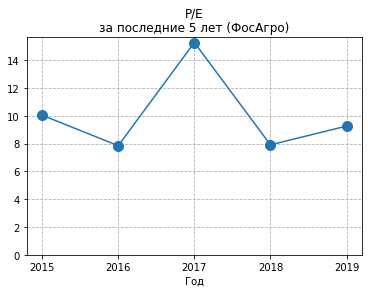

In [82]:
name = "P/E"
plt.plot( dt.index, dt['capitalization']/dt['net_profit'], marker='o', ms=10, label=name )
plt.xticks(dt.index, dt.index.astype('str'))
# plt.legend()
plt.title(f'{name}\nза последние 5 лет (ФосАгро)')
plt.xlabel('Год')
# plt.ylabel('')
plt.ylim(0, None)
plt.grid(ls='--')

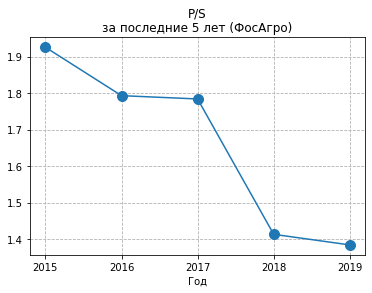

In [84]:
name = "P/S"
plt.plot( dt.index, dt['capitalization']/dt['revenue'], marker='o', ms=10, label=name )
plt.xticks(dt.index, dt.index.astype('str'))
# plt.legend()
plt.title(f'{name}\nза последние 5 лет (ФосАгро)')
plt.xlabel('Год')
# plt.ylabel('')
# plt.ylim(0, None)
plt.grid(ls='--')

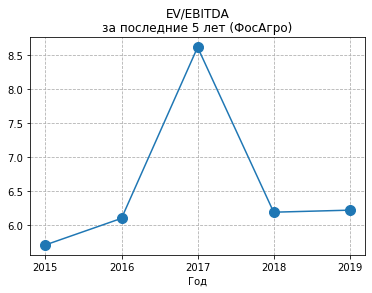

In [88]:
name = 'EV/EBITDA'
years = ['2015', '2016', '2017', '2018', '2019']
ev_ebitda = [5.71, 6.10, 8.61, 6.19, 6.22]
plt.plot(years, ev_ebitda, marker='o', ms=10, label=name )
# plt.legend()
plt.title(f'{name}\nза последние 5 лет (ФосАгро)')
plt.xlabel('Год')
# plt.ylabel('')
# plt.ylim(0, None)
plt.grid(ls='--')

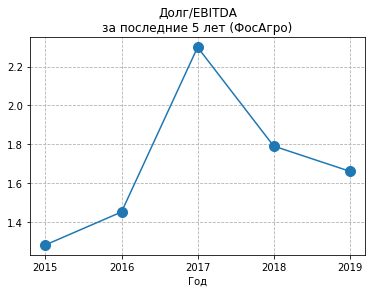

In [90]:
name = 'Долг/EBITDA'
debt_ebitda = [1.28, 1.45, 2.30, 1.79, 1.66]
plt.plot(years, debt_ebitda, marker='o', ms=10, label=name )
# plt.legend()
plt.title(f'{name}\nза последние 5 лет (ФосАгро)')
plt.xlabel('Год')
# plt.ylabel('')
# plt.ylim(0, None)
plt.grid(ls='--')

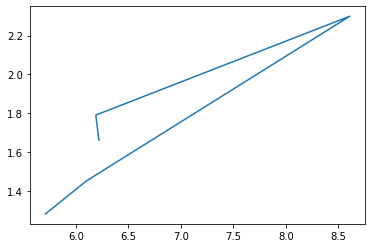

In [92]:
plt.plot(ev_ebitda, debt_ebitda)